
# 2 Explanation of different measures

[Picture would be nice]

**Example 2.1.** Consider three countries, each with 100,000 people and an area of $100km^2$, and think about the population of each square kilometre grid square.

1.  *Averagia*  has  a  uniform  spread  of  population,  with  1,000  people  living  in  each  gridsquare.
2.  *Builtupia*  has  ten  towns,  each  of  10,000  people  living  in  a  single  square  kilometre, and the remaining land is uninhabited.
3.  *Citia* has one city, where 100,000 people live in a single square kilometre, and where the remaining land is uninhabited.


Heatmap on a 10x10 grid?


Perfect situation to use a dot density map
Dot distribution map
A dot distribution map, or dot density map, is a map type that uses a dot symbol to show the presence of a feature or a phenomenon. Dot maps rely on a visual scatter to show spatial pattern.


Yes, and randomize+jitter dot placement within the defined cells of the grid.


Not sure the name of it, I see it specific to world maps, population numbers, the idea is a 3D column off of the map area, get an idea of population per x, compared to the surrounding x’s.


Same thing here, map out your distro’s, place a column going up based on pop numbers vs surrounding green space.


Choropleth map with a color scale mapped linearly to population.


Would be all the same light color cells in the grid
Would have 10 moderate color cells and very light remaining cells
would have 1 very dark cell and very light remaining cells
You could imagine hovering over each part of the map and seeing the population estimate for that subset of the countries

In [1]:

import sys

command_str = '{sys.executable} -m pip install --upgrade rhinoscriptsyntax'.format(sys=sys)
print(command_str)
!{command_str}

C:\Users\577342\AppData\Local\Continuum\anaconda3\python.exe -m pip install --upgrade rhinoscriptsyntax


ERROR: Could not find a version that satisfies the requirement rhinoscriptsyntax (from versions: none)
ERROR: No matching distribution found for rhinoscriptsyntax


In [3]:

total_pop = 100_000

averagia_people_count = 1_000
builtupia_people_count = 10_000
citia_people_count = 100_000

averagia_town_count = 0
builtupia_town_count = 10
citia_town_count = 1

gridsquare_count = total_pop/averagia_people_count
side_length = int(np.sqrt(gridsquare_count))

In [20]:

%run ../../load_magic/storage.py
s = Storage()
averagia_data = s.load_object('averagia_data')
builtupia_data = s.load_object('builtupia_data')
citia_data = s.load_object('citia_data')

In [74]:

np.flip(builtupia_data)

array([[    0,     0,     0,     0,     0,     0, 10000,     0,     0,
            0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [10000, 10000,     0,     0,     0,     0,     0,     0,     0,
            0],
       [    0, 10000,     0,     0, 10000,     0,     0,     0,     0,
            0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [    0,     0,     0, 10000,     0, 10000,     0, 10000,     0,
            0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [    0,     0,     0, 10000,     0,     0,     0,     0,     0,
            0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0]])

In [73]:

np.rot90(builtupia_data)

array([[    0,     0,     0,     0,     0,     0,     0, 10000,     0,
            0],
       [    0,     0,     0,     0,     0,     0, 10000, 10000,     0,
            0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [    0, 10000,     0, 10000,     0,     0,     0,     0,     0,
            0],
       [    0,     0,     0,     0,     0,     0, 10000,     0,     0,
            0],
       [    0,     0,     0, 10000,     0,     0,     0,     0,     0,
            0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
        10000],
       [    0,     0,     0, 10000,     0,     0,     0,     0,     0,
            0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0]])

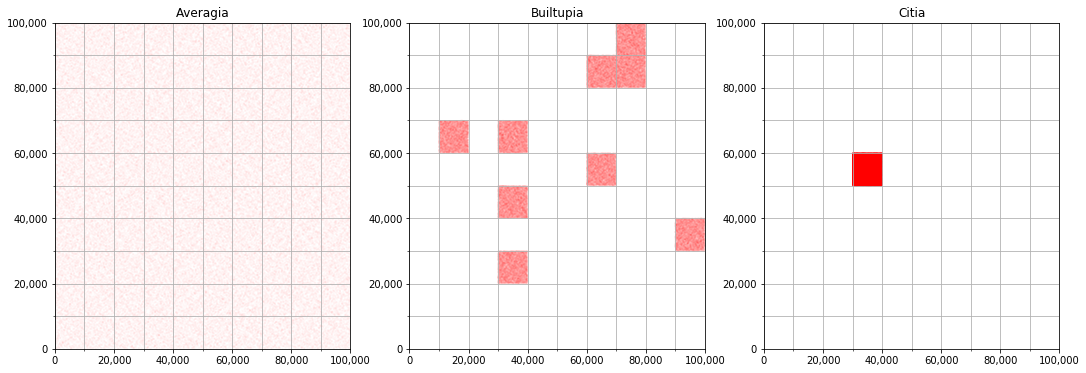

In [72]:

from matplotlib.text import Text

minor_multiple = 10_000
fig = plt.figure(figsize=(18, 18/3))
lim_tuple = (0, total_pop)
tuple_list = [(averagia_data, 'Averagia'),
              (builtupia_data, 'Builtupia'),
              (citia_data, 'Citia')]
scatter_kws = dict(c='r', alpha=0.01, marker='s', s=5, linewidths=0)
ticklabels_list = [Text(n, 0, '{:,}'.format(int(n))) for n in np.linspace(0, total_pop, 6)]

for i, data_tuple in enumerate(tuple_list):
    data = data_tuple[0]
    title = data_tuple[1]
    ax = fig.add_subplot(1, 3, i+1)
    ax.set_xlim(lim_tuple)
    ax.set_ylim(lim_tuple)
    for i in range(10):
        for j in range(10):
            local_pop = data[i][j]
            if local_pop > 0:
                x_min = i * minor_multiple
                x_max = x_min + minor_multiple - 1
                x = np.linspace(x_min, x_max, num=local_pop)
                y_min = j * minor_multiple
                y_max = y_min + minor_multiple - 1
                y = np.linspace(y_min, y_max, num=local_pop)
                np.random.shuffle(x)
                np.random.shuffle(y)
                Line2D_list = ax.scatter(x, y, **scatter_kws)
    ax.xaxis.set_minor_locator(MultipleLocator(minor_multiple))
    ax.yaxis.set_minor_locator(MultipleLocator(minor_multiple))
    ax.grid(b=True, which='major', axis='both')
    ax.grid(b=True, which='minor', axis='both')
    Text_tuple = ax.set_title(title)
    tll = ax.xaxis.set_ticklabels(ticklabels_list)
    tll = ax.yaxis.set_ticklabels(ticklabels_list)

In [67]:

[Text_obj for Text_obj in ax.xaxis.get_ticklabels()]

[Text(0.0, 0, '0'),
 Text(20000.0, 0, '20000'),
 Text(40000.0, 0, '40000'),
 Text(60000.0, 0, '60000'),
 Text(80000.0, 0, '80000'),
 Text(100000.0, 0, '100000')]

[Text(0.0, 0, '0'),
 Text(20000.0, 0, '20,000'),
 Text(40000.0, 0, '40,000'),
 Text(60000.0, 0, '60,000'),
 Text(80000.0, 0, '80,000'),
 Text(100000.0, 0, '100,000')]

In [52]:

    ticklabels_list = [Text(Text_obj.get_position()[0], Text_obj.get_position()[1],
                            '{:,}'.format(int(Text_obj.get_text()))) for Text_obj in ax.xaxis.get_ticklabels()]
    ticklabels_list = ax.xaxis.set_ticklabels(ticklabels_list)
    ticklabels_list = [Text(Text_obj.get_position()[0], Text_obj.get_position()[1],
                            '{:,}'.format(int(Text_obj.get_text()))) for Text_obj in ax.yaxis.get_ticklabels()]
    tll = ax.yaxis.set_ticklabels(ticklabels_list)

Object `Text` not found.


In [31]:

list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

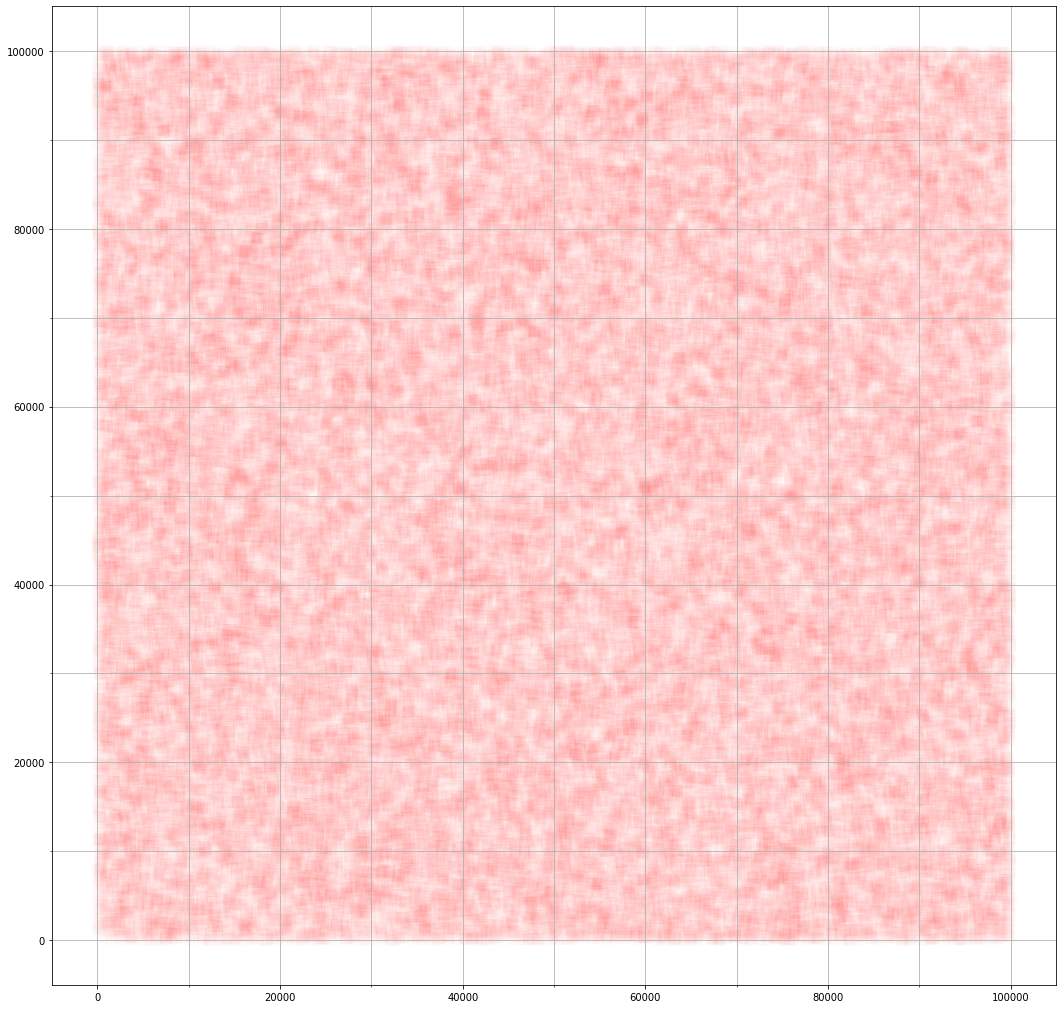

In [19]:

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator

plt.rcParams['agg.path.chunksize'] = 10_000
fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(111)
x = np.linspace(1, total_pop, num=total_pop)
y = np.linspace(1, total_pop, num=total_pop)
np.random.shuffle(x)
np.random.shuffle(y)
Line2D_list = ax.scatter(x, y, c='r', alpha=0.01, marker='s', s=150, linewidths=0)
ax.xaxis.set_minor_locator(MultipleLocator(minor_multiple))
ax.yaxis.set_minor_locator(MultipleLocator(minor_multiple))
ax.grid(b=True, which='major', axis='both')
ax.grid(b=True, which='minor', axis='both')

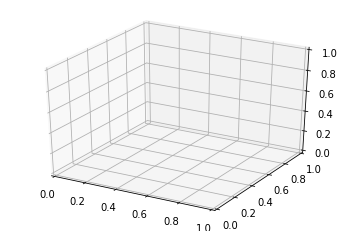

In [1]:

%matplotlib inline
%run ../../load_magic/storage.py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import os

fig = plt.figure()
ax = plt.axes(projection='3d')
#s = Storage()
#svg_dir = os.path.join(s.saves_folder, 'svg')
#file_name = 'blank.svg'
#file_path = os.path.join(svg_dir, file_name)
#fig.savefig(file_path, transparent=True)
#!"C:\Program Files\Inkscape\inkscape.exe" {os.path.abspath(file_path)}

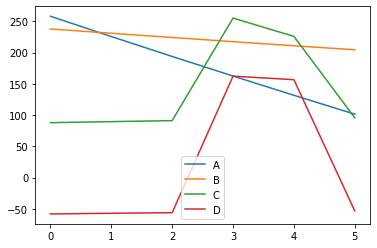

In [7]:

%matplotlib inline

rows_list = [{'A': '258.28141', 'B': '237.93957', 'C': '87.90891', 'D': '-58.11436'},
             {'A': '225.81116', 'B': '231.03808', 'C': '89.59639', 'D': '-57.12354'},
             {'A': '193.91324', 'B': '224.25823', 'C': '91.21417', 'D': '-56.15784'},
             {'A': '162.57266', 'B': '217.59684', 'C': '255.33769', 'D': '162.3804'},
             {'A': '131.77492', 'B': '211.05084', 'C': '226.02656', 'D': '156.7523'},
             {'A': '101.50606', 'B': '204.61724', 'C': '95.67653', 'D': '-53.40333'}]
df = pd.DataFrame(rows_list)
for cn in df.columns:
    df[cn] = df[cn].map(lambda x: float(x))
AxesSubplot_obj = df.plot.line()

In [8]:

from scipy.optimize import curve_fit
import numpy as np
import math

def fit_curve(get_list, given_list):
    
    def func(x, a, b):
        
        return a*x + b
    
    get_data = np.array(object=get_list)
    given_data = np.array(object=given_list)
    popt, pcov = curve_fit(func, given_data, get_data)
    line_2d_obj = plt.plot(given_data, get_data, 'b-', label='data')
    
    def predict_get(given_num):
        '''Get the number given the number'''

        return popt[0]*given_num + popt[1]

    label_str = 'fit: get_num = %5.1f * given_num + %5.1f' % tuple(popt)
    line_2d_obj = plt.plot(given_data, predict_get(given_data), 'r-', label=label_str)
    plt.xlabel('Given Number')
    plt.ylabel('Gotten Number')
    legend_obj = plt.legend()
    
    return popt, predict_get

In [13]:

df

,A,B,C,D
0,258.28141,237.93957,87.90891,-58.11436
1,225.81116,231.03808,89.59639,-57.12354
2,193.91324,224.25823,91.21417,-56.15784
3,162.57266,217.59684,255.33769,162.38040
4,131.77492,211.05084,226.02656,156.75230
5,101.50606,204.61724,95.67653,-53.40333


[0, 1, 2, 5]
fit: C = -20.246572547714607 * A + 2039.3204800242531
[-1252.2186749406876, -628.6699977250357] intead of [255.33769, 226.02656]


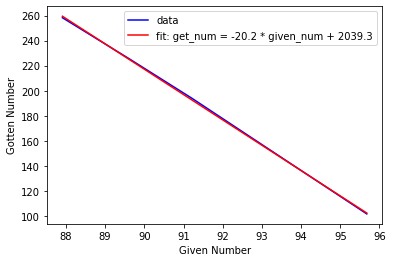

In [15]:

idx_list = list(range(3)) + [5]
mask_series = df.index.isin(idx_list)
good_a_list = df[mask_series].A.tolist()
good_c_list = df[mask_series].C.tolist()
popt, predict_get = fit_curve(good_a_list, good_c_list)
idx_list = [3, 4]
mask_series = df.index.isin(idx_list)
a_list = df[mask_series].A.tolist()
print('fit: C = {} * A + {}'.format(*popt))
c_list = [predict_get(a) for a in a_list]
print('{} intead of {}'.format(c_list, df[mask_series].C.tolist()))

fit: C = -4.303374277354286 * B + 616.4963732926979
[-319.90427079687834, -291.73438277731714] intead of [255.33769, 226.02656]


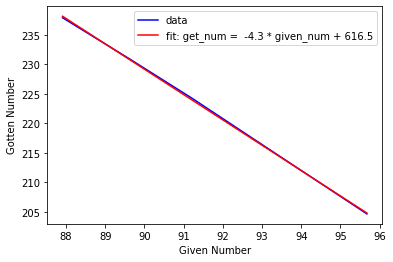

In [14]:

idx_list = list(range(3)) + [5]
mask_series = df.index.isin(idx_list)
popt, predict_get = fit_curve(df[mask_series].B, df[mask_series].C)
idx_list = [3, 4]
mask_series = df.index.isin(idx_list)
b_list = df[mask_series].B.tolist()
print('fit: C = {} * B + {}'.format(*popt))
c_list = [predict_get(b) for b in b_list]
print('{} intead of {}'.format(c_list, df[mask_series].C.tolist()))